## Import statements

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading the data

Extracting the cancer data

In [2]:
data = pd.read_csv('../../data/iris.csv', index_col  = 'Id')
data = data.replace(to_replace = ['Iris-setosa','Iris-versicolor' ,'Iris-virginica'], value = ['setosa','versicolor' ,'virginica'])

Showing the head of the data

In [3]:
data.head(10)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
Id                                                                  
1             5.1           3.5            1.4           0.2  setosa
2             4.9           3.0            1.4           0.2  setosa
3             4.7           3.2            1.3           0.2  setosa
4             4.6           3.1            1.5           0.2  setosa
5             5.0           3.6            1.4           0.2  setosa
6             5.4           3.9            1.7           0.4  setosa
7             4.6           3.4            1.4           0.3  setosa
8             5.0           3.4            1.5           0.2  setosa
9             4.4           2.9            1.4           0.2  setosa
10            4.9           3.1            1.5           0.1  setosa

# Clustering data using model having "PetalWidthCm", "SepalLengthCm", "SepalWidthCm" as features

Extracting the three classes of data

In [4]:
setosa_data = data[data["Species"] == "setosa"]
versicolor_data = data[data["Species"] == "versicolor"]
virginica_data = data[data["Species"] == "virginica"]

### 3D scatter plot of the 3 classes of the data

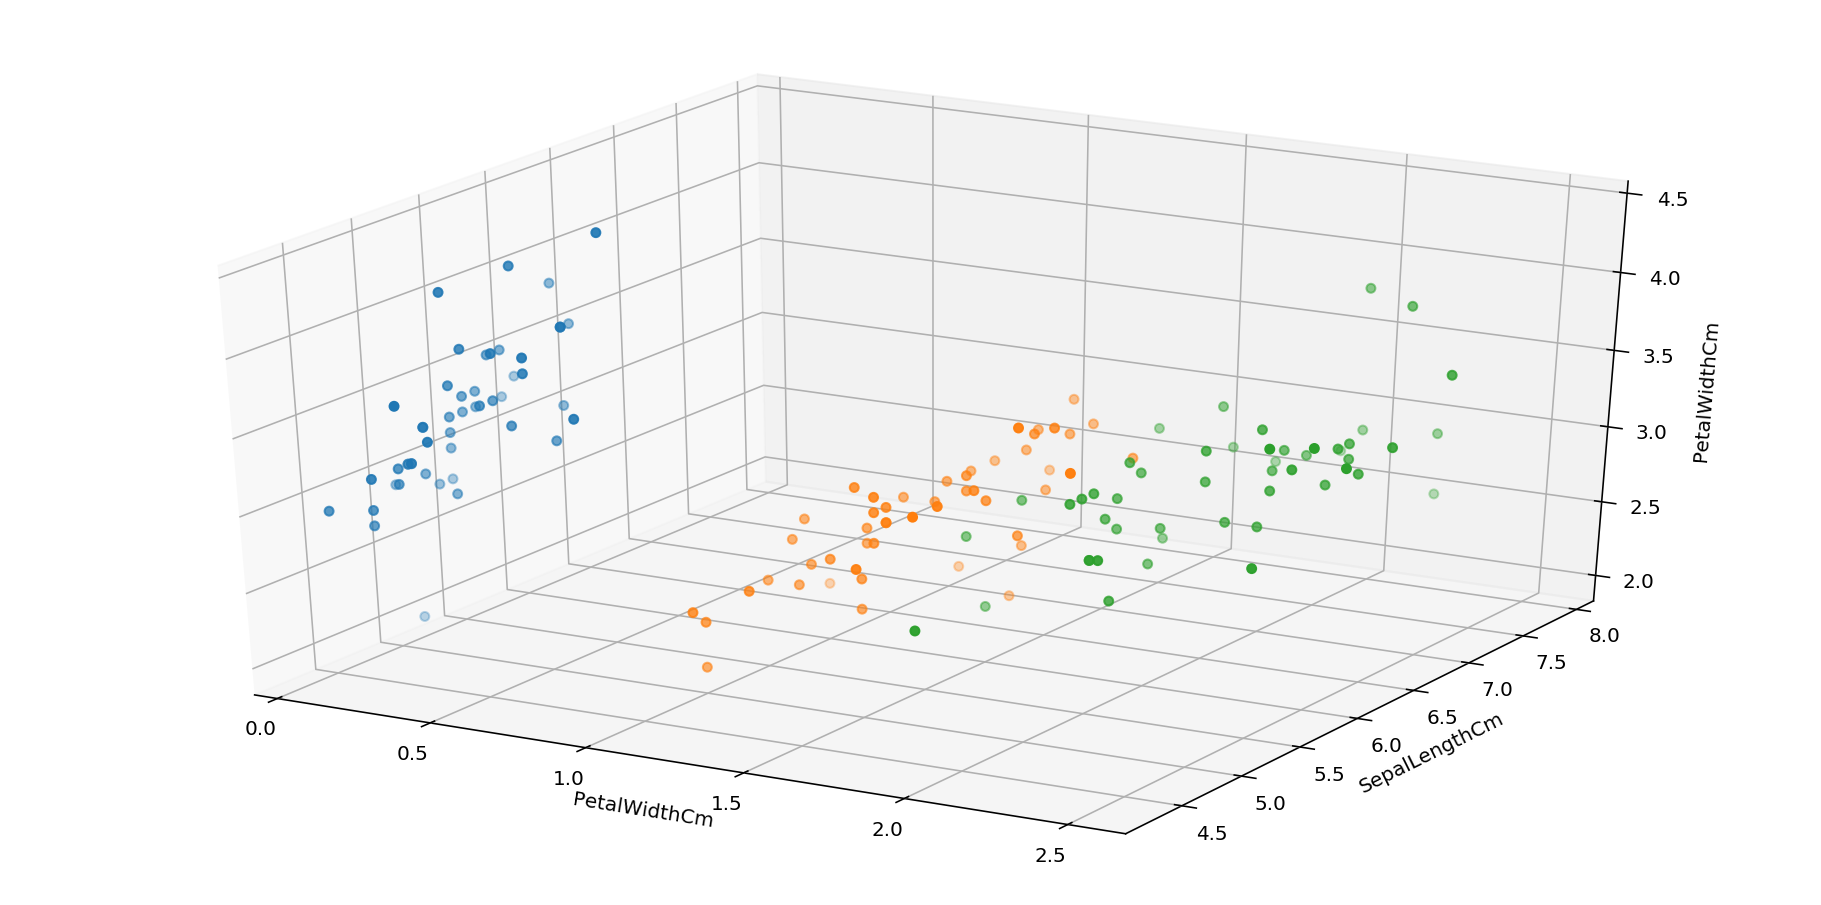

In [5]:
# extracting labels of the dimensions
xlabel, ylabel, zlabel = "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"

# scatter plot of the 3 classes
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(setosa_data[xlabel], setosa_data[ylabel], setosa_data[zlabel])
ax1.scatter(versicolor_data[xlabel], versicolor_data[ylabel], versicolor_data[zlabel])
ax1.scatter(virginica_data[xlabel], virginica_data[ylabel], virginica_data[zlabel])
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_zlabel(xlabel)
plt.show()

## Clutering the 3 classes using different number of clusters

In [6]:
# set the size of the matplotlib plot
matplotlib.rcParams['figure.figsize'] = (16.0, 24.0)

# features of the model
features = [xlabel, ylabel, zlabel]
# list of k values to try on 
k_values = range(2,8)
# list to store the final inertia value of each clustering experiments
inertia_values = []

# subplot dimension
subplot_dimension = [3,2]
# creating the figure object
fig = plt.figure()

# iterate through each k value
for k in k_values:

    # create and fit the the model using the k value
    model = KMeans(n_clusters=k, random_state=3)
    model.fit(data[features])
    # retrieve the cluster assignments
    cluster_assignments = model.labels_
    # retrieve the final inertia value
    inertia = model.inertia_ 
    inertia_values.append(inertia)
    
    # suplot index
    subplot_index = str(subplot_dimension[0]) + str(subplot_dimension[1]) + str(k-1)
    subplot_index = int(subplot_index)
    # create a subplot index
    ax = fig.add_subplot(subplot_index, projection='3d')
    
    # iterate through each cluster
    for i in range(k):
        # scatter plot of the cluster data
        ax.scatter(data[cluster_assignments == i][xlabel], data[cluster_assignments == i][ylabel],\
                    data[cluster_assignments == i][zlabel])
        # plot of the cluster centroid
        ax.scatter(model.cluster_centers_[i,0],model.cluster_centers_[i,1],\
                   model.cluster_centers_[i,2], linewidth = 10.0, c = 'k', marker="+")
     
    # plot labels
    title = "number of clusters: "+str(k)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    
# adjust the subplot space
plt.subplots_adjust(wspace = 0.10, hspace = 0.10)
# show the plot
plt.show()

## Plot of inertia vs number of clusters

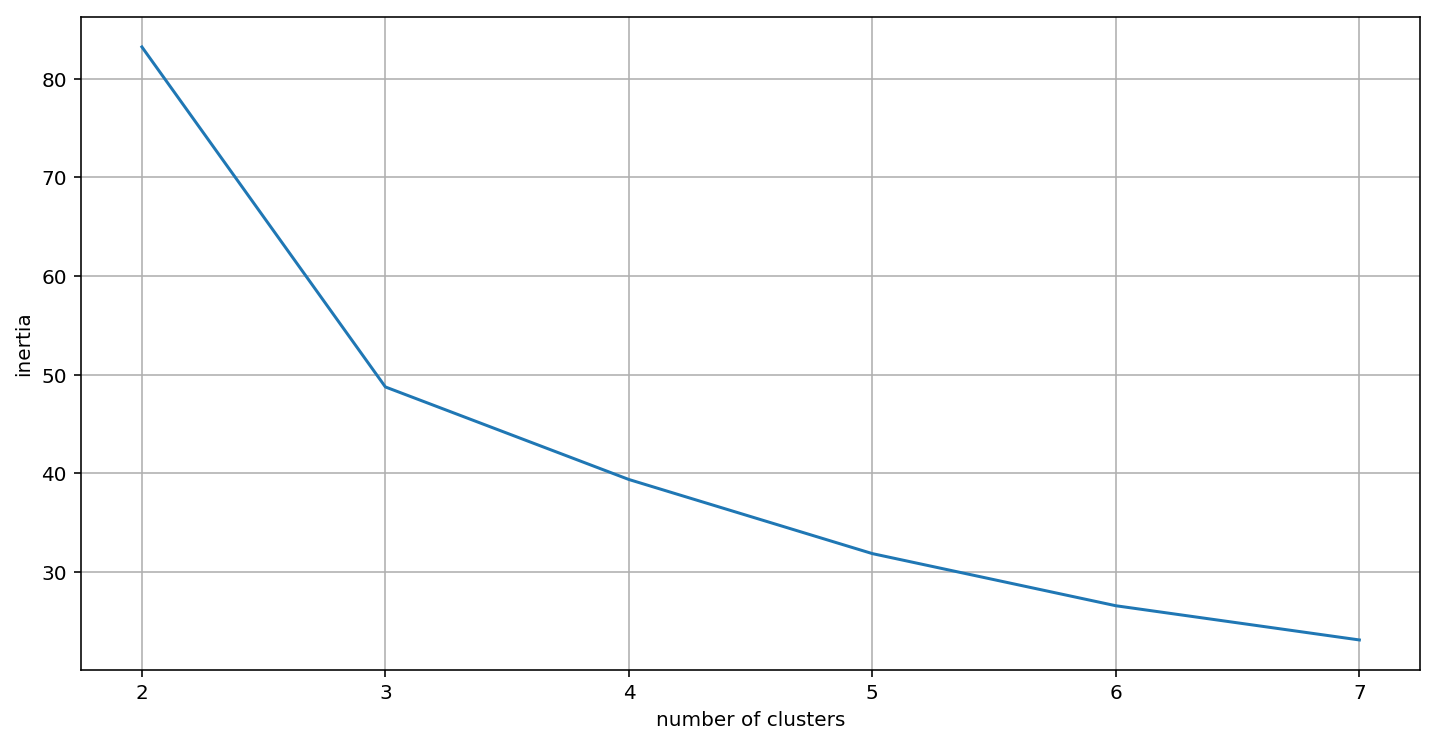

In [7]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(k_values, inertia_values)
plt.grid()
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

# Clustering data using model having "PetalWidthCm", "SepalLengthCm", "PetalLengthCm" as features

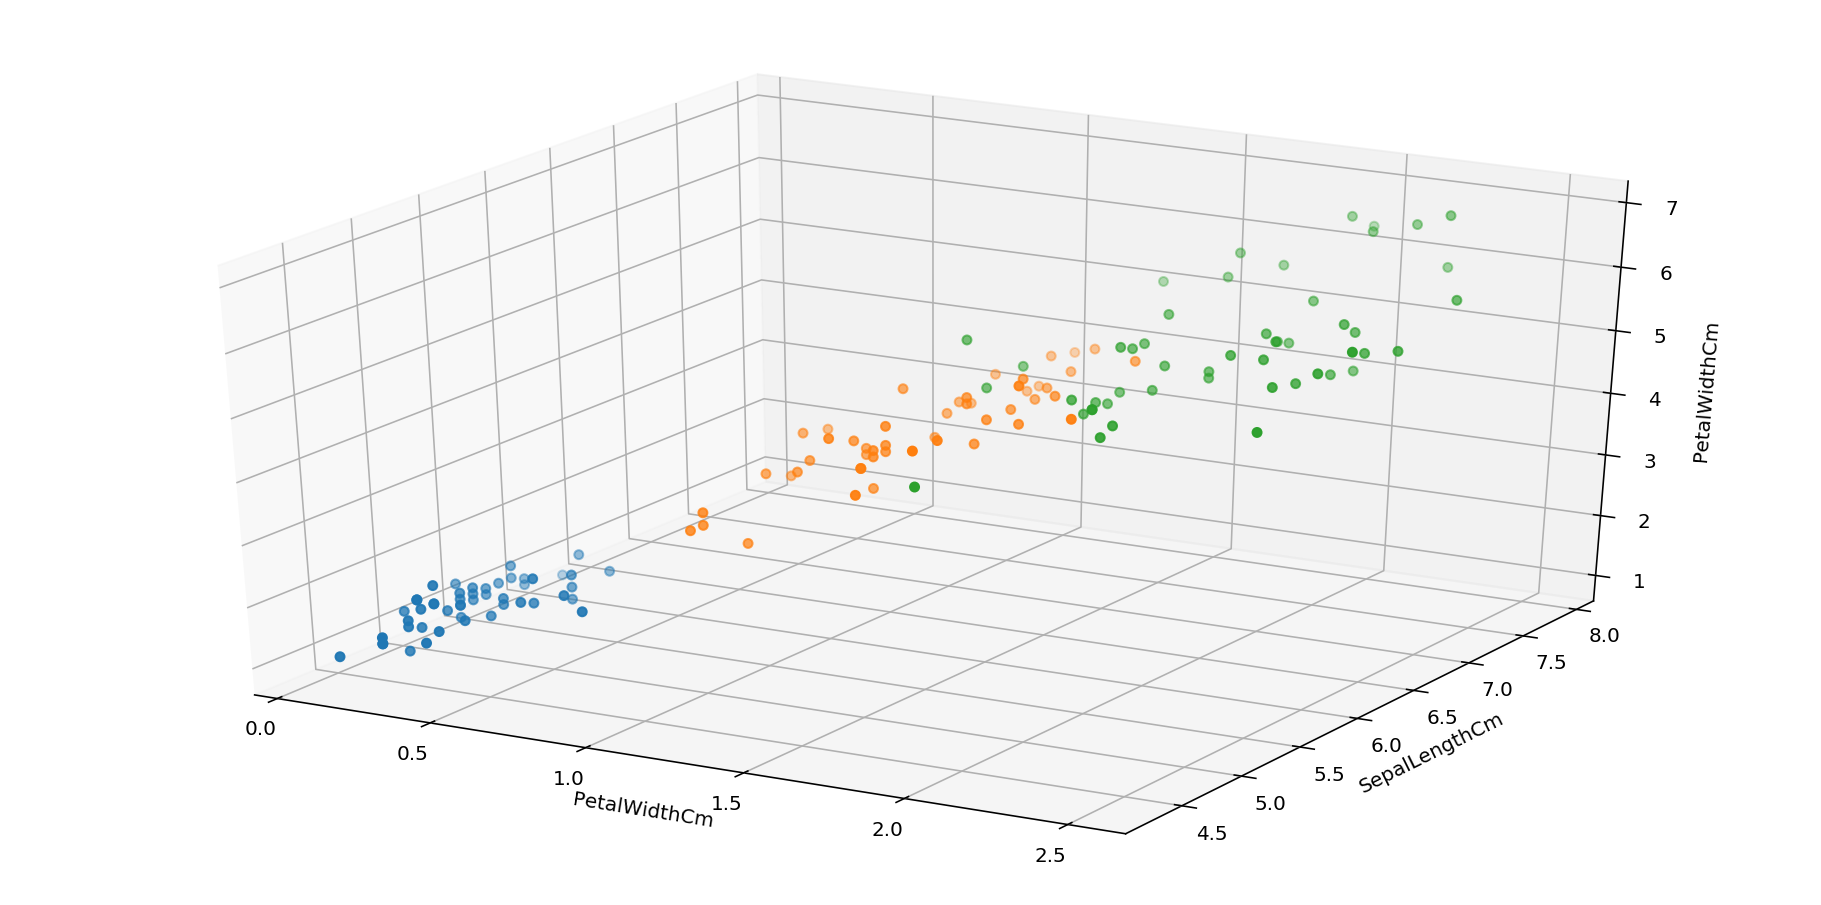

In [8]:
# set the matplotlib plot size
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
# extracting labels of the dimensions
xlabel, ylabel, zlabel = "PetalWidthCm", "SepalLengthCm", "PetalLengthCm"
# create a plot object
fig = plt.figure()
# create a scatter plot of 3 classes of data
ax = fig.add_subplot(111, projection='3d')
ax.scatter(setosa_data[xlabel], setosa_data[ylabel], setosa_data[zlabel])
ax.scatter(versicolor_data[xlabel], versicolor_data[ylabel], versicolor_data[zlabel])
ax.scatter(virginica_data[xlabel], virginica_data[ylabel], virginica_data[zlabel])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(xlabel)
plt.show()

## Clutering the 3 classes using different number of clusters

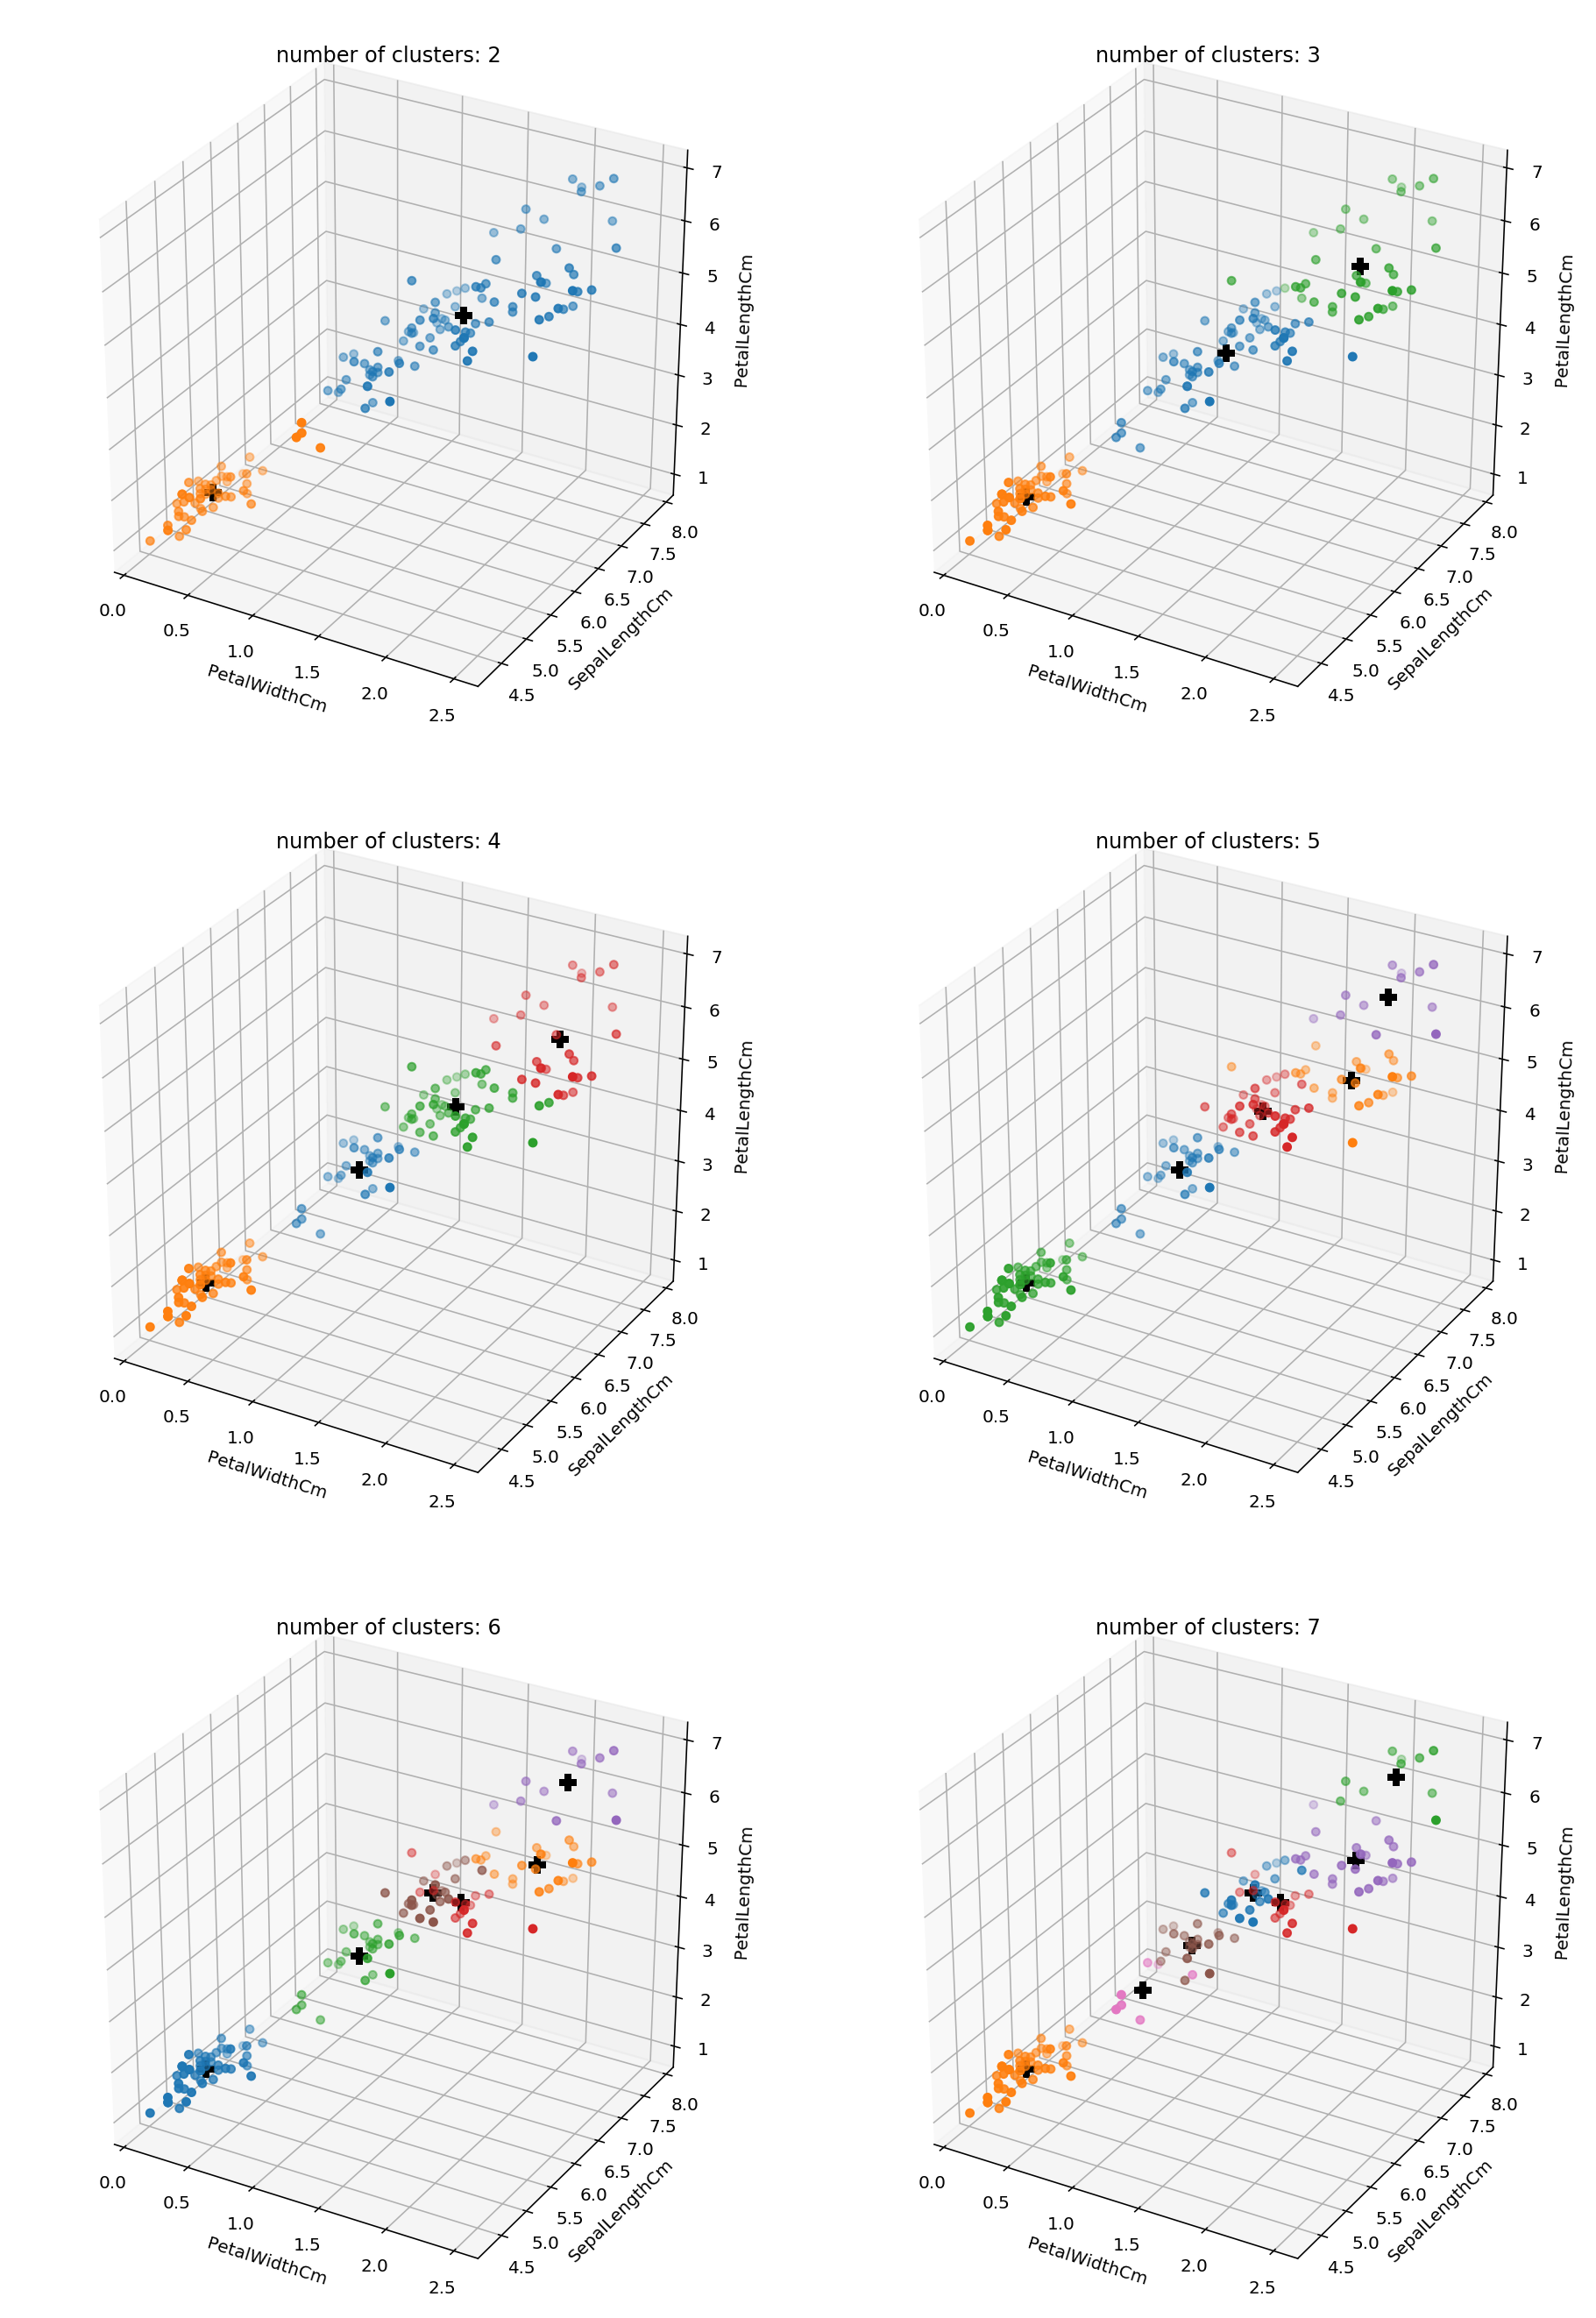

In [9]:
# set the size of the matplotlib plot
matplotlib.rcParams['figure.figsize'] = (16.0, 24.0)

# features of the model
features = [xlabel, ylabel, zlabel]
# list of k values to try on 
k_values = range(2,8)
# list to store the final inertia value of each clustering experiments
inertia_values = []

# subplot dimension
subplot_dimension = [3,2]
# creating the figure object
fig = plt.figure()

# iterate through each k value
for k in k_values:

    # create and fit the the model using the k value
    model = KMeans(n_clusters=k, random_state=3)
    model.fit(data[features])
    # retrieve the cluster assignments
    cluster_assignments = model.labels_
    # retrieve the final inertia value
    inertia = model.inertia_ 
    inertia_values.append(inertia)
    
    # suplot index
    subplot_index = str(subplot_dimension[0]) + str(subplot_dimension[1]) + str(k-1)
    subplot_index = int(subplot_index)
    # create a subplot index
    ax = fig.add_subplot(subplot_index, projection='3d')
    
    # iterate through each cluster
    for i in range(k):
        # scatter plot of the cluster data
        ax.scatter(data[cluster_assignments == i][xlabel], data[cluster_assignments == i][ylabel],\
                    data[cluster_assignments == i][zlabel])
        # plot of the cluster centroid
        ax.scatter(model.cluster_centers_[i,0],model.cluster_centers_[i,1],\
                   model.cluster_centers_[i,2], linewidth = 10.0, c = 'k', marker="+")
     
    # plot labels
    title = "number of clusters: "+str(k)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    
# adjust the subplot space
plt.subplots_adjust(wspace = 0.10, hspace = 0.10)
# show the plot
plt.show()

## Plot of inertia vs number of clusters

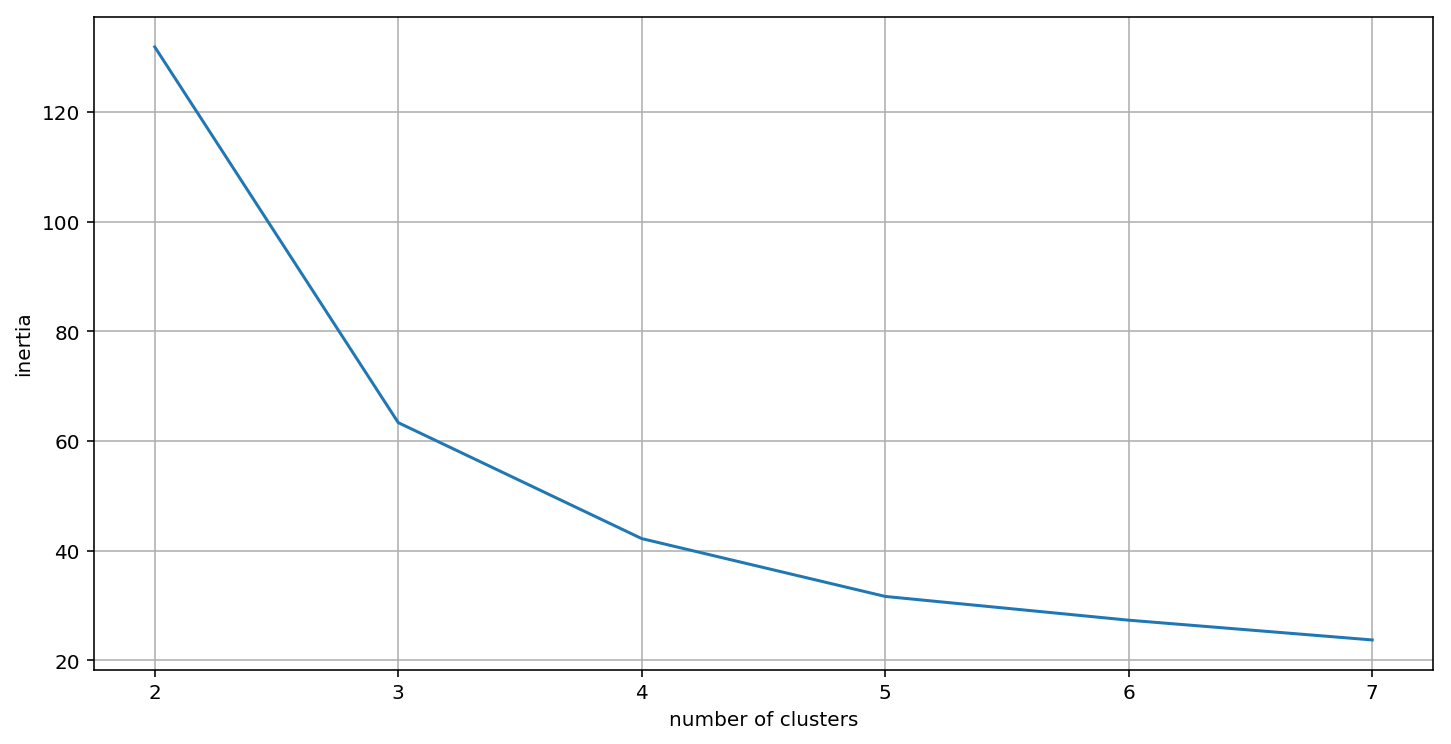

In [10]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(k_values, inertia_values)
plt.grid()
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

# Clustering 4 features instead of 3

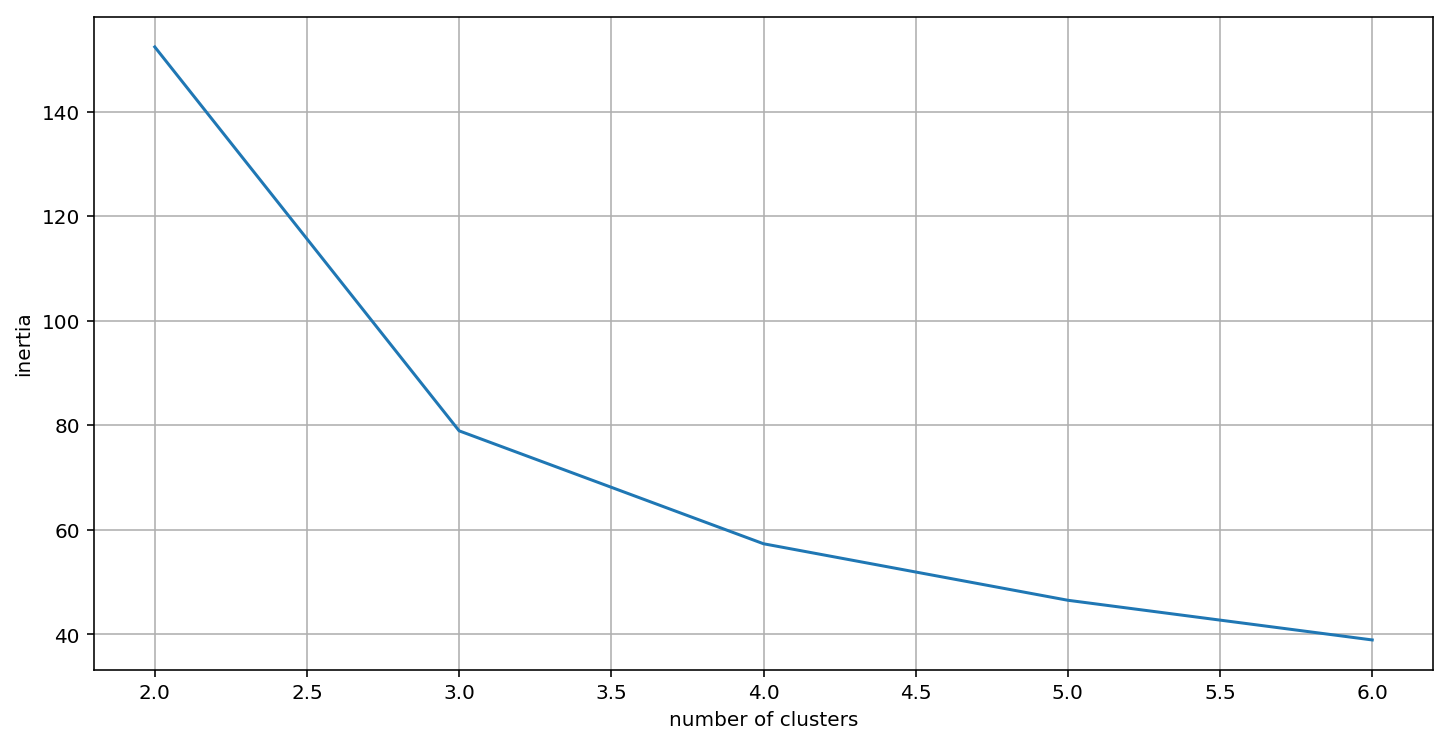

In [11]:
# features of the model
features = ["PetalLengthCm","PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]
# k values to try on
k_values = range(2,7)
# a list to store the final inertia 
inertia_values = []

# iterate through each k values
for k in k_values:

    # create and fit the model
    model = KMeans(n_clusters=k, random_state=3)
    model.fit(data[features])
    # retreive the cluster assingments
    cluster_assignments = model.labels_
    # retrieve the final inertia and append to the designated list 
    inertia = model.inertia_ 
    inertia_values.append(inertia)
    
# plot of inertia vs number of clusters
plt.plot(k_values, inertia_values)
plt.grid()
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()